## Decision Tree Regression Implementation

In [106]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [107]:
## californian housing data
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [108]:
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [109]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target

In [110]:
df.shape

(20640, 9)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [112]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [120]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape, y.shape

((20640, 8), (20640,))

In [114]:
import seaborn as sns
# sns.pairplot(X)

<Axes: >

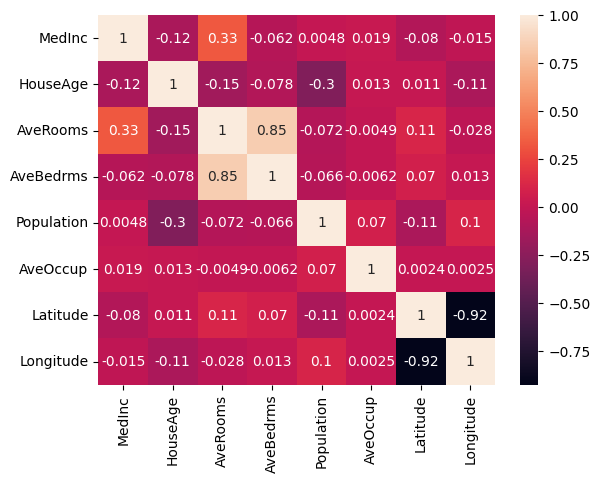

In [115]:
sns.heatmap(X.corr(), annot=True)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

#### Revision of Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

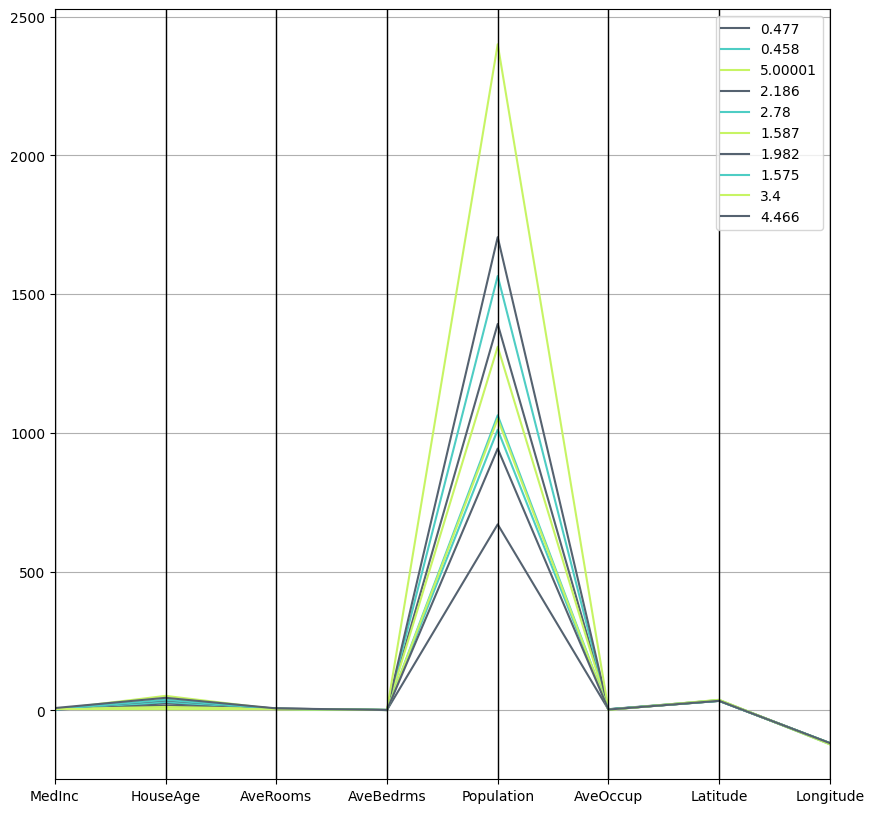

In [ ]:
from pandas.plotting import parallel_coordinates
small_df = df.sample(100, random_state=42)
plt.figure(figsize=(10, 10))  # Adjust the figsize as per your requirement
parallel_coordinates(small_df, 'target', color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()

In [130]:
# Lasso 
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Lasso = Lasso()
Lasso.fit(X_train_scaled, y_train)
y_pred = Lasso.predict(X_test_scaled)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

# Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train_scaled, y_train)
y_pred = Ridge.predict(X_test_scaled)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

# ElasticNet
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet()
ElasticNet.fit(X_train_scaled, y_train)
y_pred = ElasticNet.predict(X_test_scaled)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))


MAE: 0.906200749174264
R^2: -3.930972139576383e-06
MAE: 0.5272431374060655
R^2: 0.595788554835945
MAE: 0.8055370018368966
R^2: 0.2060087441777363


In [123]:
## cross validation
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

LassoCV = LassoCV(cv=5)
LassoCV.fit(X_train_scaled, y_train)
y_pred = LassoCV.predict(X_test_scaled)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

RidgeCV = RidgeCV(cv=5)
RidgeCV.fit(X_train_scaled, y_train)
y_pred = RidgeCV.predict(X_test_scaled)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

ElasticNetCV = ElasticNetCV(cv=5)
ElasticNetCV.fit(X_train_scaled, y_train)
y_pred = ElasticNetCV.predict(X_test_scaled)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))



MAE: 0.5275297327422834
R^2: 0.5973070377815821
MAE: 0.5272132899793809
R^2: 0.5959440604913042
MAE: 0.5273485028763852
R^2: 0.596844167423262


#### Ridge perfrom better than Lasso in this case .

## Decision Tree Regression

In [131]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [132]:
y_pred = regressor.predict(X_test_scaled)

In [133]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MAE: 0.4678017958656331
R^2: 0.602157060251689


In [134]:
parameters = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error','poisson'],
    'splitter':['best', 'random'],
    'max_depth':[2,3,4,5,6,7,8,9,10,20,30],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'max_features':['int', 'sqrt', 'log2']
}
regressor = DecisionTreeRegressor()

In [135]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

In [136]:
regressorcv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
                         'max_features': ['int', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [138]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 5,
 'splitter': 'best'}

In [152]:
regressor_best = DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='log2', min_samples_split=5, splitter='best')

In [153]:
regressor_best.fit(X_train_scaled, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='log2',
                      min_samples_split=5)

In [146]:
X_test_scaled = X_test_scaled[:500]
y_test = y_test[:500]

<Axes: ylabel='target'>

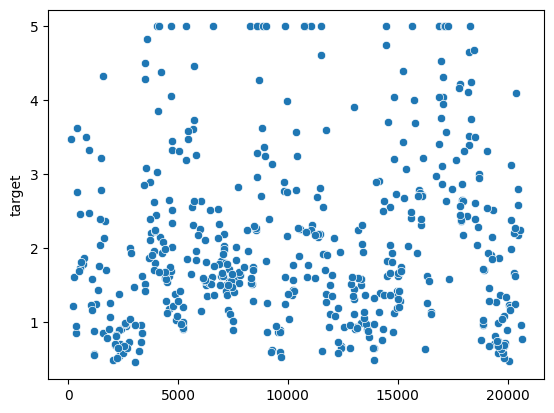

In [147]:
y_pred = regressorcv.predict(X_test_scaled)
sns.scatterplot(y_test)

In [150]:
from sklearn.metrics import r2_score , confusion_matrix
r2_score(y_test, y_pred)



0.7048041892934165

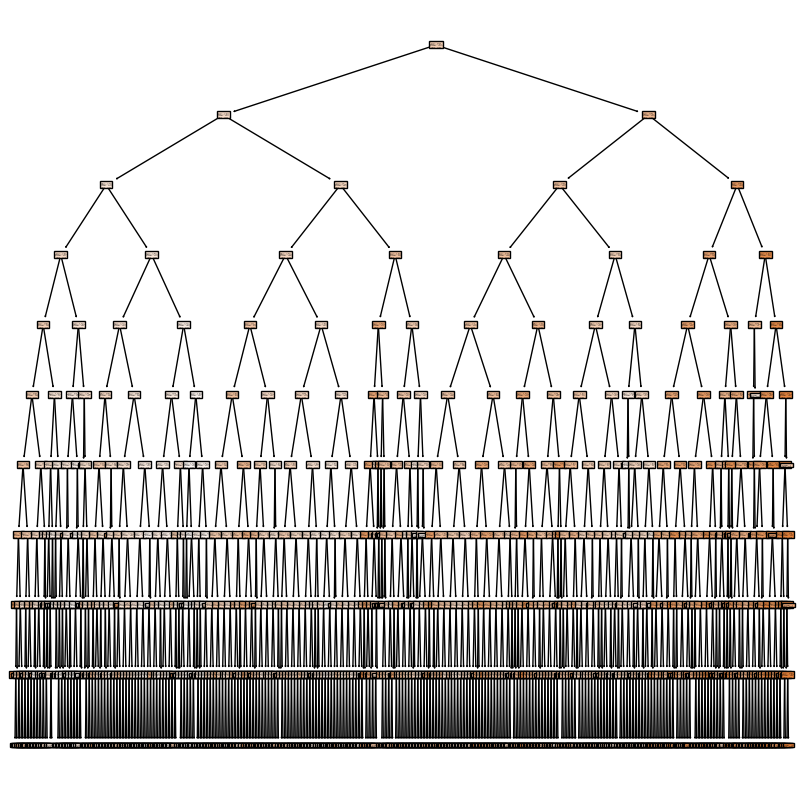

In [156]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(regressor_best,filled=True)
plt.show()